![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from math import sqrt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
%matplotlib inline

In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [ ]:
df.shape

(541462, 3)

<Axes: >

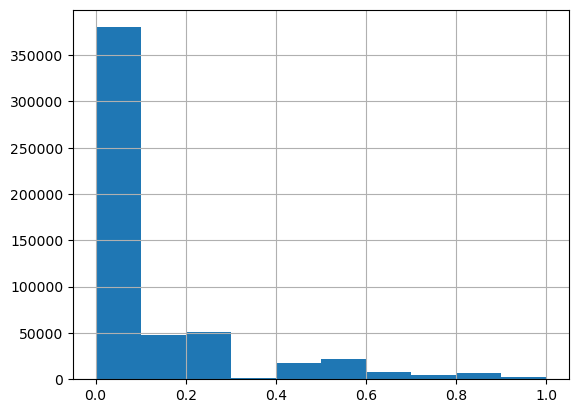

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [ ]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1
##Ajuste de datos de entrenamiento con funcion CountVectorizer
vect_A = CountVectorizer()
X_dtm_A = vect_A.fit_transform(X_train)

##Transformación de datos test
test_X = vect_A.transform(X_test)

#Entrenamiento Modelo de Regresion Lineal
regLineal = LinearRegression()
regLineal.fit(X_dtm_A, y_train)

#Evaluación Modelo de Regresion Lineal con MSE y RMSE
y_pred_regLineal= regLineal.predict(test_X)
mse_regLineal = mean_squared_error(y_test, y_pred_regLineal)
rmse_regLineal = sqrt(mse_regLineal)
print(f"MSE Regresion lineal = {mse_regLineal:.3f}, RMSE Regresion lineal = {rmse_regLineal:.3f}")

MSE Regresion lineal = 0.037, RMSE Regresion lineal = 0.193


Al ajustar los datos de entrenamiento con CountVectorizer y entrenar el modelo de regresión lineal, se encuentra que el MSE es de 0.037. Esto indica que, en promedio, la diferencia al cuadrado entre los valores reales y los valores predichos por el modelo es de 0.037. Al calcular la raíz cuadrada del MSE, se obtiene un RMSE de 0.193. Esto significa que en promedio hay una diferencia del 0.193 unidades entre el valor real y el valor predicho, aunque el modelo tiene una capacidad de predicción aceptable, sería necesario reducir la brecha para alcanzar un punto óptimo.

In [ ]:
#Entrenamiento Modelo de XGBoost
XGB = XGBRegressor()
XGB.fit(X_dtm_A, y_train)

#Evaluación Modelo XGBoost con MSE y RMSE
y_pred_XGB= XGB.predict(test_X)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
rmse_XGB = sqrt(mse_XGB)
print(f"MSE XGBoost Regressor = {mse_XGB:.3f}, RMSE XGBoost Regressor = {rmse_XGB:.3f}")

MSE XGBoost Regressor = 0.021, RMSE XGBoost Regressor = 0.144


Al entrenar un modelo de XGBoost, se observa un mejor desempeño en comparación con el modelo de regresión lineal.  El MSE del modelo XGBoost es de 0.021, lo que indica que, en promedio, la diferencia al cuadrado entre los valores reales y los valores predichos es de 0.021. Al calcular la raíz cuadrada del MSE, se obtiene un RMSE de 0.144. Esto significa que en promedio la diferencia entre el valor real y el valor predicho de la probabilidad de toxicidad es de 0.144 unidades, reduciendo en 0.049 unidades la brecha en comparación con los resultados del modelo de regresion lineal.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2

#Ajuste de datos de entrenamiento usando trigramas
vect_B = CountVectorizer(ngram_range=(3, 3))
X_dtm_B = vect_B.fit_transform(X_train)

##Transformación de datos test
test_XB = vect_B.transform(X_test)


#Entrenamiento Modelo de Regresion Lineal
regLineal_B = LinearRegression()
regLineal_B.fit(X_dtm_B, y_train)

#Evaluación Modelo de Regresion Lineal con MSE y RMSE
y_pred_regLineal_B = regLineal_B.predict(test_XB)
mse_regLineal_B = mean_squared_error(y_test, y_pred_regLineal_B)
rmse_regLineal_B = sqrt(mse_regLineal_B)

print(f"MSE Regresion lineal = {mse_regLineal_B:.3f}, RMSE Regresion lineal = {rmse_regLineal_B:.3f}")

MSE Regresion lineal = 0.040, RMSE Regresion lineal = 0.200


Al ajustar los datos de entrenamiento con CountVectorizer considerando trigramas y entrenar el modelo de regresión lineal, se encuentra que el MSE es de 0.040. Esto indica que, en promedio, la diferencia al cuadrado entre los valores reales y los valores predichos por el modelo es de 0.040. Al calcular la raíz cuadrada del MSE, se obtiene un RMSE de 0.20. Esto significa que en promedio hay una diferencia del 0.20 unidades entre el valor real y el valor predicho.

Por otro lado, al comparar los modelos de regresión lineal entrenados con CountVectorizer, se observa que al utilizar trigramas en lugar de unigramas, el desempeño es similar e incluso ligeramente menos favorable, ya que el RMSE pasa de 0.193 a 0.20.

In [ ]:
#Entrenamiento Modelo de XGBoost
XGB_B = XGBRegressor()
XGB_B.fit(X_dtm_B, y_train)

#Evaluación Modelo XGBoost con MSE y RMSE
y_pred_XGB_B= XGB_B.predict(test_XB)
mse_XGB_B = mean_squared_error(y_test, y_pred_XGB_B)
rmse_XGB_B = sqrt(mse_XGB_B)
print(f"MSE XGBoost Regressor = {mse_XGB_B:.3f}, RMSE XGBoost Regressor = {rmse_XGB_B:.3f}")

MSE XGBoost Regressor = 0.037, RMSE XGBoost Regressor = 0.191


Al ajustar los datos de entrenamiento con CountVectorizer considerando trigramas y entrenar el modelo de XGBoost, se encuentra que el MSE es de 0.037. Esto indica que, en promedio, la diferencia al cuadrado entre los valores reales y los valores predichos por el modelo es de 0.037. Al calcular la raíz cuadrada del MSE, se obtiene un RMSE de 0.191. Esto significa que en promedio hay una diferencia del 0.191 unidades entre el valor real y el valor predicho.

Al comparar los modelos de XGBoost entrenados con CountVectorizer, se evidencia un menor desempeño al utilizar trigramas con un RMSE del 0.191, en comparación con el RMSE de 0.144 obtenido al utilizar unigramas.

Además, se observa que al realizar la tokenización con CountVectorizer considerando trigramas, se tiene una mayor afectación en el desempeño del modelo XGBoost en comparación con el modelo de regresión lineal.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

In [ ]:
#Celda 3

**TfidfVectorizer**


---


La función TfidfVectorizer es una técnica de tokenización basada en TF IDF (Term Frequency times Inverse Document Frequency o frecuencia del término por frecuencia inversa de documento), y es equivalente a es equivalente a CountVectorizer seguido de TfidfTransformer.

Además, es una función matemática que expresa qué tan relevante es una palabra para un documento en una colección.

La fórmula es la siguiente:

      TfIdf (t, d, D)  =  tf (t,d) · idf (t, D)

![image info](https://media.licdn.com/dms/image/C5612AQEXpKFLy-I3Kg/article-inline_image-shrink_400_744/0/1578727974822?e=2147483647&v=beta&t=Lovb0IvasZHuWIUJFyrx-qhRiA0b4M2O_FTicWbOztw)

Se compone de dos partes:
1. **TF (term frequency)**: calcula la frecuencia de término, también conocida como el número de veces que una palabra aparece en un documento, dividido por el número total de palabras en ese documento. <sub>[1]</sub> Esta parte del cálculo responde a la pregunta: ¿Con qué frecuencia el término aparece en este documento? *Mientras mayor sea la frecuencia del término en el documento, mayor será su importancia.*<sub>[3]</sub>
2. **IDF (inverse document frequency - Frecuencia inversa del documento)**: Calculada como el logaritmo del número de documentos en el corpus dividido por el número de documentos donde aparece el término específico. Mide la importancia/relevancia, también denominado peso, de un término en un conjunto de documentos. <sub>[1]</sub> En esta parte, la herramienta responde: ¿Con qué frecuencia el término aparece en todos los documentos de la colección? *Mientras mayor sea la frecuencia en los documentos, menor será la importancia del término.*<sub>[3]</sub>

El producto de ambos valores da una métrica que permite saber cómo de únicas y relevantes son las palabras de un documento.

El cálculo del IDF considera qué términos se repiten frecuentemente en los textos, como artículos y conjunciones (el, la, lo, y, pero, que, etc.), y no tienen relevancia para los documentos. Por lo tanto, cuando el factor IDF se incorpora, el cálculo disminuye el peso de los términos que ocurren con mucha frecuencia en el conjunto de documentos y aumenta el peso de los términos que aparecen más raramente. <sub>[3]</sub>

Un valor más alto de tfidf significa una mayor importancia de las palabras en el corpus, mientras que los valores más bajos representan una menor importancia. Además, se dice que TF-IDF es mejor que Count Vectorizers porque se centra en la frecuencia de las palabras presentes en el corpus y proporciona una importancia a las palabras. <sub>[2]</sub>

En resumen, la importancia del término (valor TF-IDF) aumenta de acuerdo con el número de veces que la palabra aparece en el documento (TF). Pero se compensa por el número de repeticiones en la colección de documentos (IDF), lo que sirve para ajustar el hecho de que algunas palabras aparecen con más frecuencia en general. <sub>[3]</sub>



**Ventajas**
1. Considera la importancia de cada término en todo el cuerpo del documento.
2. Mitiga el impacto de las palabras comunes que son poco relevantes, por ejemplo los artículos.

**Desventajas**
1. No tiene en cuenta las similitudes o sinónimos entre palabras, ya que realiza conteos sin tener en cuenta que términos como "persona" y "humano" son conceptualmente similares.
<br>



---



**[1]** Rodríguez, Á. (13 de julio de 2021). Qué es TF*IDF y por qué debes usarlo. O no. Obtenido de Kiwosan.com: https://kiwosan.com/seo/tf-idf/

**[2]** Saket, S. (2020). Count Vectorizer vs TFIDF Vectorizer | Natural Language Processing. Obtenido de Linkedin: https://www.linkedin.com/pulse/count-vectorizers-vs-tfidf-natural-language-processing-sheel-saket

**[3]** Casarotto, C. (4 de octubre de 2021). TF-IDF: el abordaje de optimización on page que tu blog necesita. Obtenido de rockcontent: https://rockcontent.com/es/blog/que-es-tf-idf/#:~:text=TF%2DIDF%20es%20un%20c%C3%A1lculo%20estad%C3%ADstico%20adoptado%20por%20el%20algoritmo,conjunto%20m%C3%A1s%20grande%20de%20p%C3%A1ginas.



## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4

#Ajuste de datos de entrenamiento usando TfidfVectorizer
vect_C = TfidfVectorizer()
X_dtm_C = vect_C.fit_transform(X_train)

##Transformación de datos test
test_XC = vect_C.transform(X_test)

#Entrenamiento Modelo de Regresion Lineal
regLinealC = LinearRegression()
regLinealC.fit(X_dtm_C, y_train)

#Evaluación Modelo de Regresion Lineal con MSE y RMSE
y_pred_C = regLinealC.predict(test_XC)
mse_regLineal_C = mean_squared_error(y_test, y_pred_C)
rmse_regLineal_C = sqrt(mse_regLineal_C)
print(f"MSE Regresion lineal = {mse_regLineal_C:.3f}, RMSE Regresion lineal = {rmse_regLineal_C:.3f}")

MSE Regresion lineal = 0.028, RMSE Regresion lineal = 0.167


Al utilizar la tokenización con TfidfVectorizer y entrenar el modelo de regresión lineal, se obtuvo un MSE de 0.028. Esto indica que, en promedio, la diferencia al cuadrado entre los valores reales y los valores predichos por el modelo es de 0.028. Al calcular la raíz cuadrada del MSE, se obtiene un RMSE de 0.167, lo que significa que en promedio hay una diferencia de 0.167 unidades entre el valor real y el valor predicho.

Al comparar los resultados de los modelos de regresión lineal entrenados con el tokenizador CountVectorizer con el modelo entrenado con el tokenizador TfidfVectorizer, se observa un mejor desempeño, con un RMSE de 0.163. Esta mejora en el RMSE representa una reducción de aproximandamente 0.03 en comparación con los modelos anteriores.

In [ ]:
#Entrenamiento Modelo de XGBoost
XGB_C = XGBRegressor()
XGB_C.fit(X_dtm_C, y_train)

#Evaluación Modelo XGBoost con MSE y RMSE
y_pred_XGB_C= XGB.predict(test_XC)
mse_XGB_C = mean_squared_error(y_test, y_pred_XGB_C)
rmse_XGB_C = sqrt(mse_XGB_C)
print(f"MSE XGBoost Regressor = {mse_XGB_C:.3f}, RMSE XGBoost Regressor = {rmse_XGB_C:.3f}")

MSE XGBoost Regressor = 0.022, RMSE XGBoost Regressor = 0.148


Al procesar los comentarios con TfidfVectorizer y ejecutar el modelo de XGBoost, se obtiene un desempeño similar (0.148) e incluso levemente inferior en comparación con el modelo que procesa los datos con CountVectorizer y unigrama (0.144). Es importante recordar que el peor desempeño de XGBoost se obtuvo al considerar CountVectorizer y trigramas.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

In [ ]:
# Celda 5
import matplotlib.pyplot as plt
import seaborn as sns
#función de etiquetas
def add_labels(plots):
    for bar in plots.patches:
      plots.annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
#función de graficar
def graficar(x, y, medida_desempeño):
    df = pd.DataFrame({'Tokenizador': x, medida_desempeño: y})

    plt.figure(figsize=(10, 6))
    plots = sns.barplot(x='Tokenizador', y= medida_desempeño, data=df, palette="viridis")
    add_labels(plots)
    plt.title(f'Comparación del {medida_desempeño}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

### Desempeño Modelo de Regresion Lineal

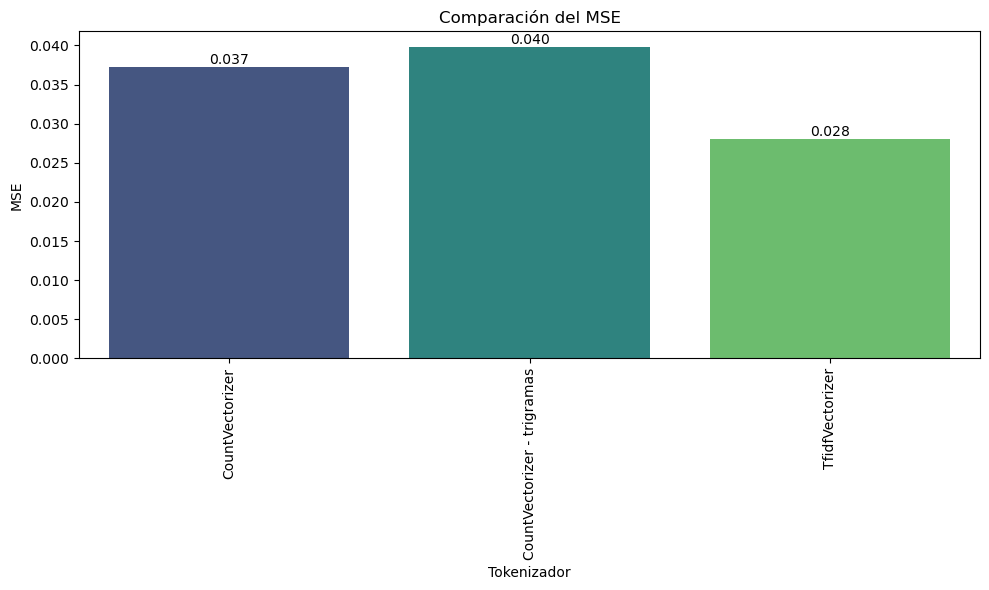

In [ ]:
ejex = ['CountVectorizer', 'CountVectorizer - trigramas', 'TfidfVectorizer']
ejey = [mse_regLineal, mse_regLineal_B, mse_regLineal_C]
graficar(ejex, ejey, 'MSE')

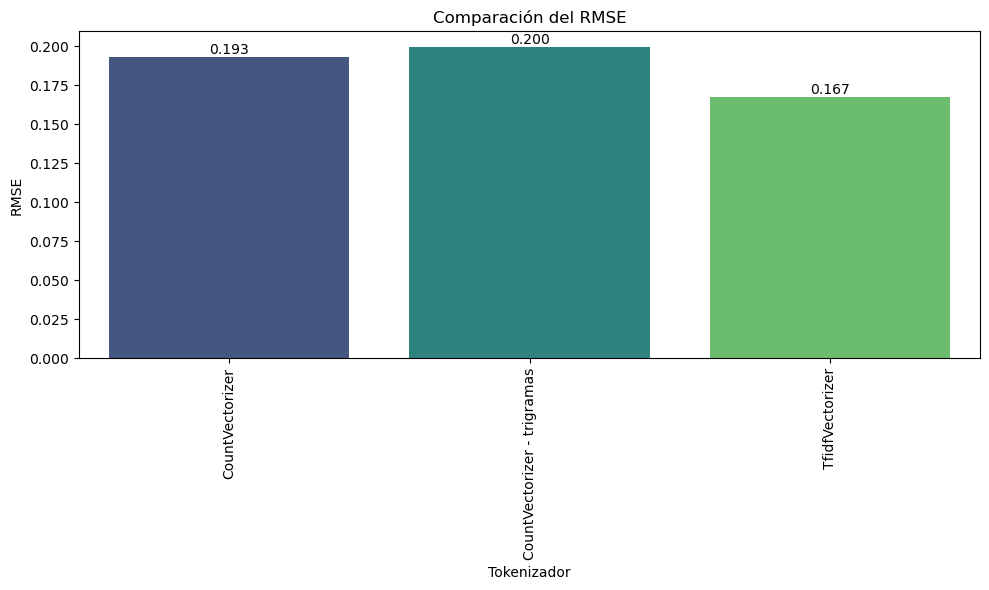

In [ ]:
ejex = ['CountVectorizer', 'CountVectorizer - trigramas', 'TfidfVectorizer']
ejey = [rmse_regLineal, rmse_regLineal_B, rmse_regLineal_C]
graficar(ejex, ejey, 'RMSE')

Conclusiones Regresion Lineal:
- Al ajustar los datos de entrenamiento con CountVectorizer y entrenar el modelo de regresión lineal, se observa que en promedio hay una diferencia del 0.193 entre el valor real y el valor predicho, aunque el modelo tiene una capacidad de predicción aceptable, sería necesario reducir la brecha para alcanzar un punto óptimo.
- Al comparar los modelos de regresión lineal entrenados con CountVectorizer, se observa que al utilizar trigramas en lugar de unigramas, el desempeño es similar e incluso ligeramente menos favorable, ya que el RMSE pasa de 0.193 a 0.20.
- Al comparar los resultados de los modelos de regresión lineal entrenados con el tokenizador CountVectorizer con el modelo entrenado con el tokenizador TfidfVectorizer, se observa un mejor desempeño, con un RMSE de 0.163. Esta mejora en el RMSE representa una reducción de aproximandamente 0.03 en comparación con los modelos anteriores.
- El peor desempeño de la regresión lineal se obtuvo al considerar CountVectorizer y trigramas.

### Desempeño Modelo de XGBoost

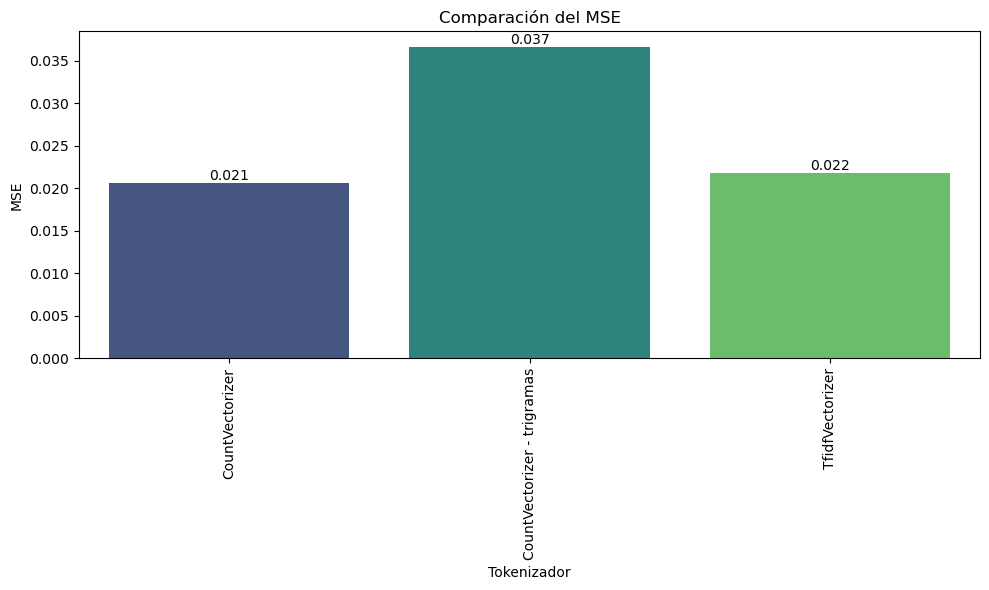

In [ ]:
ejex = ['CountVectorizer', 'CountVectorizer - trigramas', 'TfidfVectorizer']
ejey = [mse_XGB, mse_XGB_B, mse_XGB_C]
graficar(ejex, ejey, 'MSE')

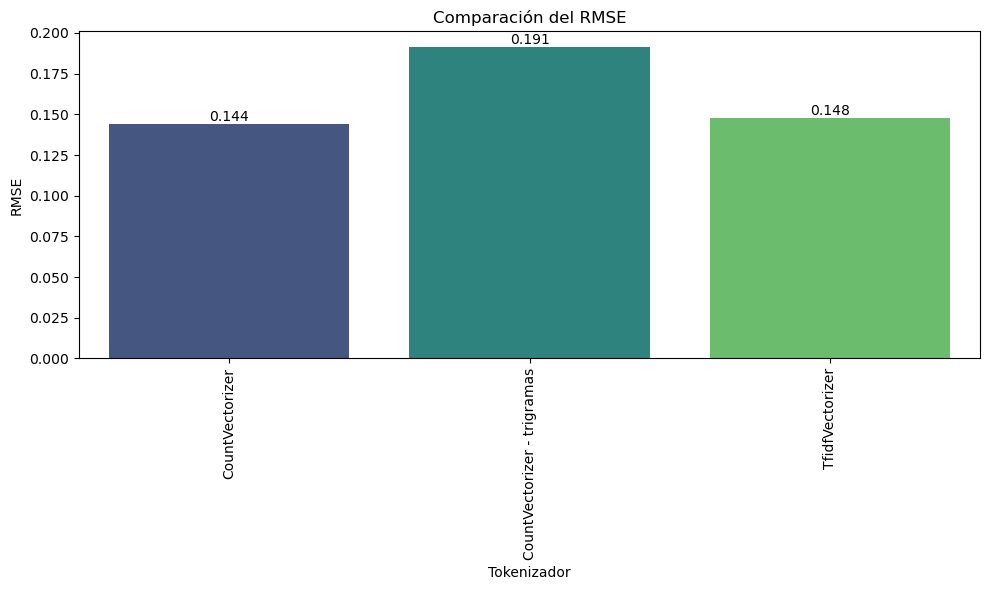

In [ ]:
ejex = ['CountVectorizer', 'CountVectorizer - trigramas', 'TfidfVectorizer']
ejey = [rmse_XGB, rmse_XGB_B, rmse_XGB_C]
graficar(ejex, ejey, 'RMSE')

Conclusiones XGBoost:
- Al entrenar un modelo de XGBoost, se observa un mejor desempeño en comparación con el modelo de regresión lineal. En promedio la diferencia entre el valor real y el valor predicho de la probabilidad de toxicidad es de 0.144 unidades, reduciendo en 0.049 unidades la brecha en comparación con los resultados del modelo de regresion lineal.
- Al comparar los modelos de XGBoost entrenados con CountVectorizer, se evidencia un menor desempeño al utilizar trigramas con un RMSE del 0.191, en comparación con el RMSE de 0.144 obtenido al utilizar unigramas.
- Se observa que al realizar la función CountVectorizer con trigramas, se tiene una mayor afectación en el desempeño de XGBoost que en regresión lineal.
- Al procesar los comentarios con TfidfVectorizer y ejecutar el modelo de XGBoost, se obtiene un desempeño similar (0.148) e incluso levemente inferior en comparación con el modelo que procesa los datos con CountVectorizer y unigrama (0.144).
- El peor desempeño de XGBoost se obtuvo al considerar CountVectorizer y trigramas.

## **Conclusion Final**

El procesamiento de texto tiene un impacto significativo en el desempeño de los modelos, lo que nos recuerda la importancia de seleccionar adecuadamente la función de tokenización y el número de n-gramas. Una mala elección puede llevar a resultados menos favorables en la capacidad de predicción de los modelos. Un ejemplo de ello se pudo evidenciar en el uso de trigramas, donde se evidneció una disminución en el desempeño de los modelos, tanto de XGBoost como de regresión lineal. La diferencia en el desempeño se hizo evidente al observar un MSE más alto en comparación con los otros métodos de tokenización.

Aunque podría pensarse que el uso de trigramas mejoraría el desempeño de los modelos de tokenización analizados, al proporcionar contexto, en el caso particular de este ejercicio no fue así, lo cual se atribuye a las etiquetas de toxicidad de la base de datos. Dentro de las ventajas del uso de unigramas se destaca su simplicidad, ya que cada palabra es tratada independientemente, lo cual es util cuando se quieren identificar palabras comunes o claves dentro de las oraciones, aunque presentan la desventaja de que ignoran el contexto y las relaciones con las demás palabras de la frase lo cual puede llegar a generar perdidas de información y en este caso en particual podría generar falsos postivios. Adicionalmente, se destaca que el uso de unigrama requiere un menor esfuerzo computacionel que el uso de trigramas.